In [ ]:
# Install libraries
!pip install kagglehub tensorflow numpy matplotlib

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub
import os
import matplotlib.pyplot as plt


In [ ]:
# Download Food-11 dataset using kagglehub
path = kagglehub.dataset_download("trolukovich/food11-image-dataset")
print("Path to dataset:", path)

# Check dataset structure
for root, dirs, files in os.walk(path):
    print(root, len(files))


100%|██████████| 1.08G/1.08G [00:18<00:00, 62.7MB/s]

Extracting files...


Path to dataset: /root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1 0
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation 0
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation/Dessert 500
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation/Seafood 303
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation/Egg 335
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation/Vegetable-Fruit 231
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation/Noodles-Pasta 147
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation/Bread 368
/root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1/evaluation/Dairy product 148
/root/.cache/kagglehub/datasets/t

In [ ]:
# Paths to training and validation data
train_dir = os.path.join(path, "training")
val_dir = os.path.join(path, "validation")

# Image generators for preprocessing and augmentation
image_size = (128, 128)  # Smaller image size to save RAM
batch_size = 16  # Small batch size to prevent memory issues

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [ ]:
# Simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,739 (28.20 MB)

 Trainable params: 7,393,739 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5  # Reduce epochs to save time and memory
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


617/617 ━━━━━━━━━━━━━━━━━━━━ 349s 557ms/step - accuracy: 0.1855 - loss: 2.2911 - val_accuracy: 0.3000 - val_loss: 2.0427
Epoch 2/5
617/617 ━━━━━━━━━━━━━━━━━━━━ 373s 547ms/step - accuracy: 0.2835 - loss: 2.0136 - val_accuracy: 0.3157 - val_loss: 1.9476
Epoch 3/5
617/617 ━━━━━━━━━━━━━━━━━━━━ 382s 546ms/step - accuracy: 0.3080 - loss: 1.9221 - val_accuracy: 0.3315 - val_loss: 1.9211
Epoch 4/5
617/617 ━━━━━━━━━━━━━━━━━━━━ 388s 557ms/step - accuracy: 0.3430 - loss: 1.8589 - val_accuracy: 0.3758 - val_loss: 1.8011
Epoch 5/5
617/617 ━━━━━━━━━━━━━━━━━━━━ 375s 546ms/step - accuracy: 0.3580 - loss: 1.8151 - val_accuracy: 0.3825 - val_loss: 1.8015


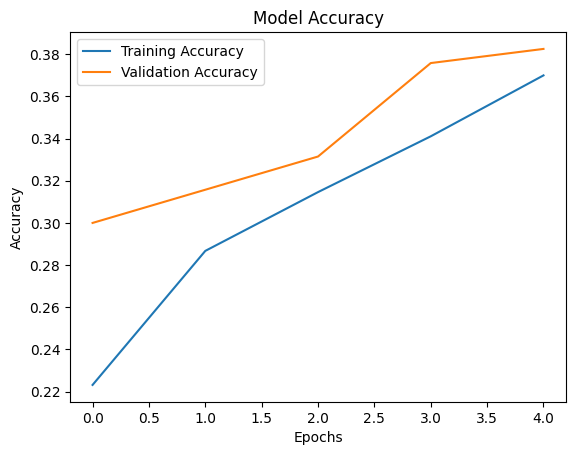

215/215 ━━━━━━━━━━━━━━━━━━━━ 32s 149ms/step - accuracy: 0.3860 - loss: 1.8239
Validation Accuracy: 38.25%


In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


215/215 ━━━━━━━━━━━━━━━━━━━━ 31s 145ms/step
Confusion Matrix:
[[ 38   2  86  26   9  85  34   0   5  29  48]
 [ 13   0  41  10   8  28  11   0   3   8  22]
 [ 50   0 130  19  14 127  50   0   5  44  61]
 [ 29   2 105  19   6  70  26   0   4  22  44]
 [ 37   5  85  16   8  72  27   0   6  25  45]
 [ 50   3 106  24  24  91  40   0   4  41  66]
 [  9   1  38  12  10  33   9   0   2  17  16]
 [ 10   1  26   1   3  26   5   0   2   8  14]
 [ 44   2 100  15  10  78  25   0   5  26  42]
 [ 49   2 121  28  20 105  50   0   5  42  78]
 [ 21   0  69   7  11  52  20   0   4  15  33]]
Classification Report:
                 precision    recall  f1-score   support

          Bread       0.11      0.10      0.11       362
  Dairy product       0.00      0.00      0.00       144
        Dessert       0.14      0.26      0.18       500
            Egg       0.11      0.06      0.08       327
     Fried food       0.07      0.02      0.04       326
           Meat       0.12      0.20      0.15       4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


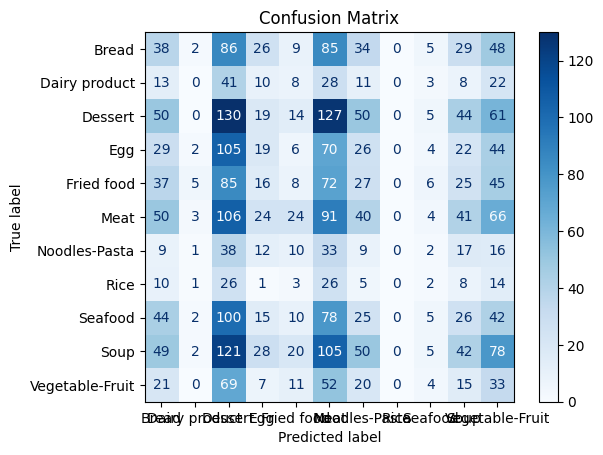

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions on the validation set
y_true = val_generator.classes  # True labels
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
class_labels = list(train_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:")
print(report)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

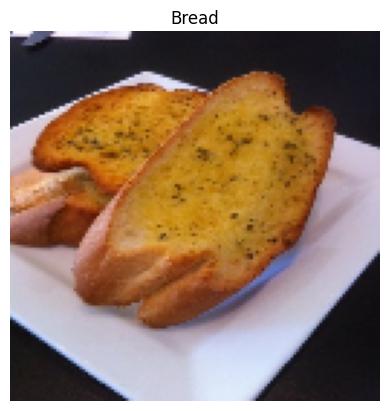

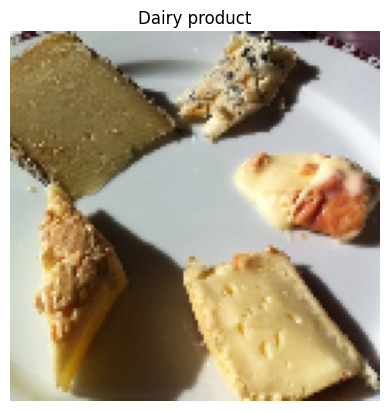

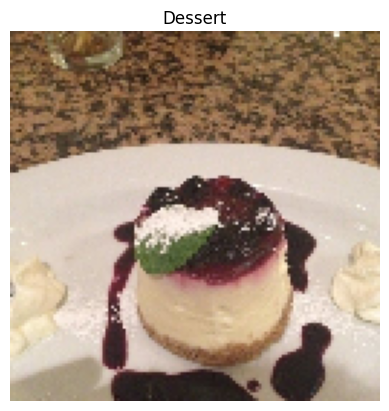

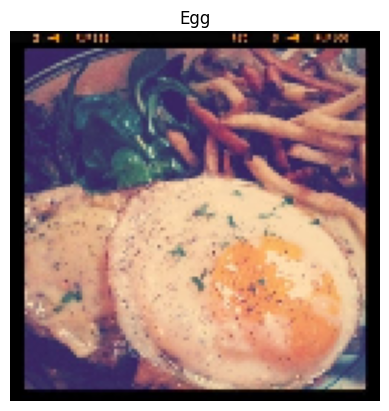

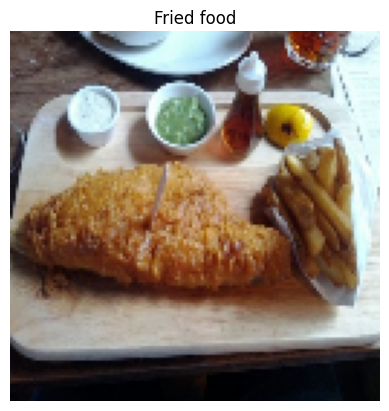

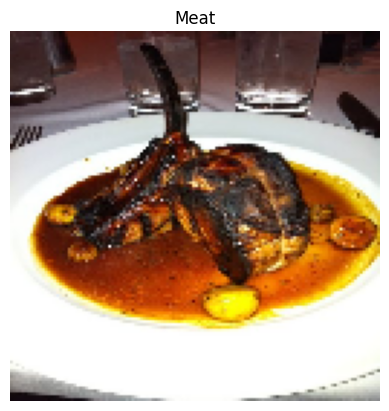

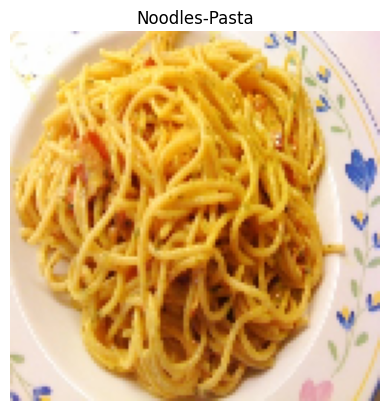

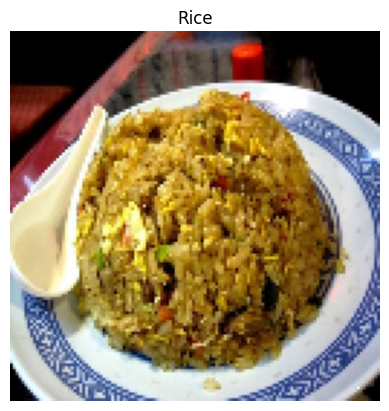

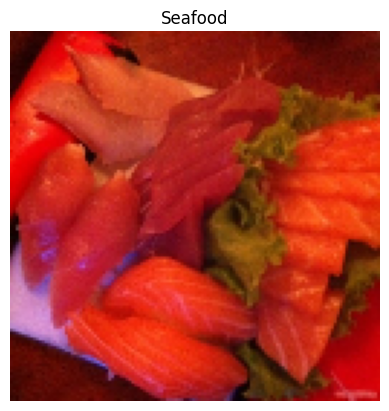

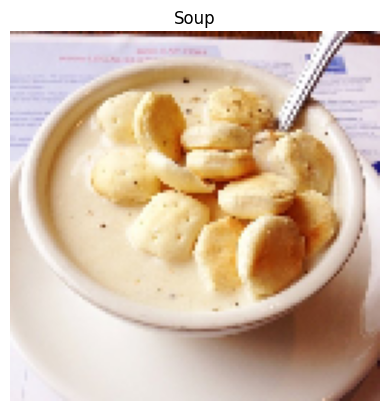

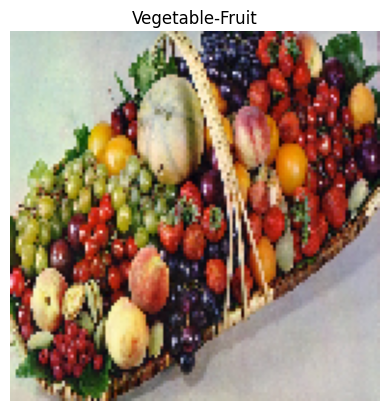

In [ ]:
for class_name in class_labels:
    class_dir = os.path.join(train_dir, class_name)
    sample_image = os.listdir(class_dir)[0]  # Take the first image from the class folder
    sample_image_path = os.path.join(class_dir, sample_image)
    img = image.load_img(sample_image_path, target_size=image_size)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
    plt.show()

In [ ]:
# Save the model
model.save("food11_cnn_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))  # Load and resize image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


In [ ]:
from google.colab import files
import numpy as np

# Upload the file
print("Upload Food image file here!")
uploaded = files.upload()  # User uploads the file here
image_path = next(iter(uploaded))  # Get the uploaded file name

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict using the model
predictions = model.predict(processed_image)

# Retrieve the predicted class
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())  # Class names from training

# Display the results
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {predictions[0][predicted_class] * 100:.2f}%")


Upload Food image file here!


Saving Veg.jpg to Veg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: Vegetable-Fruit
Confidence: 99.74%


In [ ]:
# Calorie mapping for 11 classes with example values
calorie_mapping = {
    "Bread": 265,
    "Dairy product": 150,
    "Dessert": 400,
    "Egg": 155,
    "Fried food": 312,
    "Meat": 250,
    "Noodles-Pasta": 221,
    "Rice": 130,
    "Seafood": 200,
    "Soup": 75,
    "Vegetable-Fruit": 50
}

# Retrieve the predicted class and calorie information
predicted_label = class_labels[predicted_class]
calories = calorie_mapping.get(predicted_label, "Unknown")

print(f"Predicted Class: {predicted_label}")
print(f"Confidence: {predictions[0][predicted_class] * 100:.2f}%")
print(f"Estimated Calories: {calories} kcal")


Predicted Class: Vegetable-Fruit
Confidence: 99.74%
Estimated Calories: 50 kcal
